In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Download dataset from Kaggle

In [2]:
!pip install opendatasets -q

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ruwanpathirana8
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 11.0MB/s]

In [6]:
df = pd.read_csv("random-linear-regression/test.csv")

### Data Preprocessing

In [7]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
df.shape

(300, 2)

In [9]:
X = df["x"]
y = df["y"]

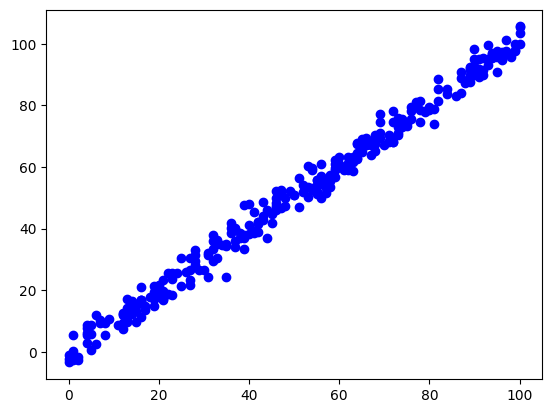

In [10]:
plt.scatter(X, y, c='b')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((240,), (60,))

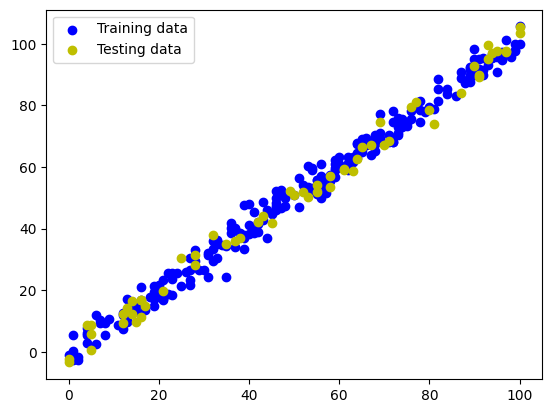

In [13]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

### Model Building

In [14]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.4926 - mae: 16.4926  
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7452 - mae: 3.7452 
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9312 - mae: 4.9312 
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8420 - mae: 2.8420 


In [15]:
X_train.shape

(240,)

In [16]:
tf.expand_dims(X_train, axis=-1).shape

TensorShape([240, 1])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (168.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28 (116.00 B)

In [18]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[86.5094  ],
       [73.0868  ],
       [90.34444 ],
       [ 5.015031],
       [87.46816 ]], dtype=float32)

In [19]:
y_test[:5]

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


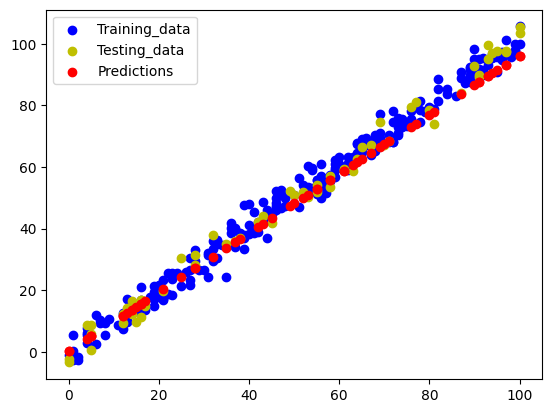

In [20]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

### Evaluate Model

In [21]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3405 - mae: 3.3405  


[3.116424560546875, 3.116424560546875]

In [27]:
# Using MAE (Mean Absolute Error)
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_pred))
mae_value = mae_metric.result().numpy()  # Convert the result to a numpy value
mae_value

3.1164243

In [30]:
# Using MSE (Mean Squared Error)
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, tf.squeeze(y_pred))
mse_value = mse_metric.result().numpy()  # Convert the result to a numpy value
mse_value


15.933486

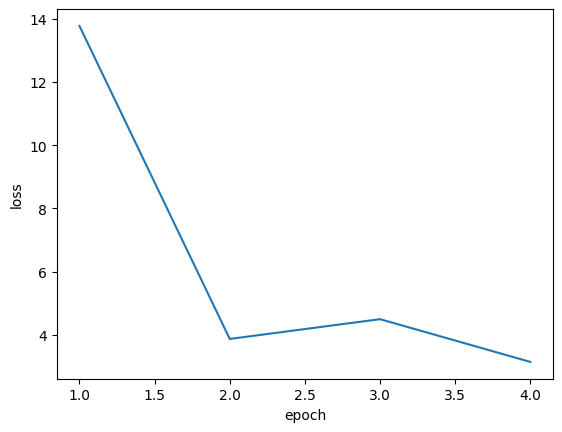

In [31]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Model Weights and Baises

In [32]:
# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-0.1176789   0.08188087 -0.52785075 -1.1616467 ]] 
Biases:
 [ 0.0952125   0.19462506  0.16768889 -0.08357512]

Weights:
 [[ 0.7036613 ]
 [-0.07724559]
 [ 0.02440103]
 [-0.91315925]] 
Biases:
 [0.08887124]
